---   
<img align="left" width="110"   src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg"> 
<h1 align="center">Tools and Techniques for Data Science</h1>
<h1 align="center">Neural Networks From Scratch in Python</h1>

---  

<h3 align="right"> Muhammad Sheraz (Data Scientist)</h3>
<h1 align="center"> Lec 3 (Activation Functions)</h1>

<img width='100%' src='Images/activation functions.jpg'>

## ReLU Activation Function
<img align='right' src='Images/relu.jpg'>

- ReLU stands for Rectified Linear Unit.
- It is a `non-linear activation function` widely used in neural networks.
- Mathematically, ReLU is defined as `f(x) = max(0, x)`,which means it `returns 0` for any negative input and the input value for any positive input.

### Advantages
- ReLU is computationally efficient and helps in addressing the `vanishing gradient problem` during training.
- One of its main advantages is that it introduces sparsity in the network by setting negative values to zero, which can help prevent `overfitting`.
- ReLU is often used in hidden layers of neural networks, especially in deep learning architectures.

### Disadvantages
- Despite its advantages, ReLU can suffer from the `dying ReLU` problem where neurons may become inactive and permanently output zero for any input.
- To address the dying ReLU problem, variants such as `Leaky ReLU` and `Parametric ReLU` have been introduced.


In [71]:
inputs = [ 0 , 2 , - 1 , 3.3 , - 2.7 , 1.1 , 2.2 , - 100 ]
output = []
for i in inputs:
    if i > 0 :
        output.append(i)
    else :
        output.append( 0 )
print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [62]:
inputs = [ 0 , 2 , - 1 , 3.3 , - 2.7 , 1.1 , 2.2 , - 100 ]
output = []
for i in inputs:
    output.append( max ( 0 , i))
print (output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [63]:
import numpy as np
inputs = [ 0 , 2 , - 1 , 3.3 , - 2.7 , 1.1 , 2.2 , - 100 ]
output = np.maximum( 0 , inputs)
print (output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


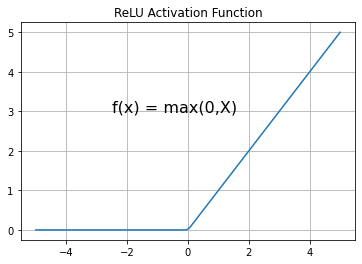

In [84]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

x_values = np.linspace(-5, 5, 100)
y_values = relu(x_values)
plt.plot(x_values, y_values, label='ReLU Function')
plt.title('ReLU Activation Function')
plt.grid(True)
plt.annotate('f(x) = max(0,X)', xy=(-2.5,3),fontsize=16)
plt.show()

In [65]:
class Activation_ReLU :
    def forward ( self , inputs ):
        self.output = np.maximum( 0 , inputs)

In [66]:
from nnfs.datasets import spiral_data

In [67]:
X, y = spiral_data( samples = 100 , classes = 3 )
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense( 2 , 3 )
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Make a forward pass of our training data through this layer
dense1.forward(X)

In [68]:
dense1.output[: 5 ]

array([[ 0.        ,  0.        ,  0.        ],
       [-0.00019159,  0.00011516,  0.00010612],
       [-0.00046103,  0.00010994,  0.00031692],
       [-0.00057144,  0.00034756,  0.00031502],
       [-0.00078807,  0.00044588,  0.00044675]])

In [69]:
# Forward pass through activation func.
# Takes in output from previous layer
activation1.forward(dense1.output)

In [70]:
# Let's see output of the first few samples:
activation1.output[: 5 ]

array([[0.        , 0.        , 0.        ],
       [0.        , 0.00011516, 0.00010612],
       [0.        , 0.00010994, 0.00031692],
       [0.        , 0.00034756, 0.00031502],
       [0.        , 0.00044588, 0.00044675]])

> **As you can see, negative values have been clipped (modified to be zero). That’s all there is to the
rectified linear activation function used in the hidden layer.**

## Softmax Activation Function

<img align='right' src='Images/softmax.jpg'>

- Softmax is a `non-linear activation function` commonly used in `classification problems` in neural networks.
- Mathematically, softmax is defined as the exponential of each input divided by the sum of all exponentials in the input vector. This can be represented as:

   <img align='center' src='Images/softmax1.png'>

### Advantages

- Softmax function normalizes the output into a `probability distribution`, ensuring that the output values are between `0` and `1` and sum up to `1`.
- It is useful for `multi-class classification` tasks as it provides the probability distribution over multiple classes.

  
### Disadvantages

- Softmax function can suffer from `numerical instability`, especially when dealing with large input values, which can lead to `overflow` or `underflow` issues.
- It is sensitive to `outliers` in the input data, which can affect the model's predictions.
- Softmax outputs are `not robust` to changes in input scale, as small changes in the input can lead to significant changes in the output probabilities.

### Explaination
- Softmax transforms uncalibrated inputs into a probability distribution.
- The `output` of Softmax represents `confidence scores` for each class.
- The predicted class is associated with the highest confidence score.
- Confidence scores sum up to `1`, providing context for predictions.
- `Lower confidence` scores may indicate `uncertainty` in predictions.

### Non-normalized or uncalibrated inputs
- Non-normalized or uncalibrated inputs refer to raw data that hasn't been `transformed` or `standardized`.
- In the context of neural networks, this means the input values haven't been adjusted or `scaled` to a specific range or distribution.
- For example, `pixel values` in `images` ranging from `0 to 255` are considered uncalibrated inputs.
- In Softmax activation, uncalibrated inputs are typically `raw scores or logits` from the previous layer.
- These scores may have arbitrary values and are not directly `interpretable` as probabilities.
- Softmax transforms these uncalibrated inputs into a probability distribution by `exponentiating` and normalizing them.
- This transformation allows the model to `output` probabilities representing the `likelihood` of each class.


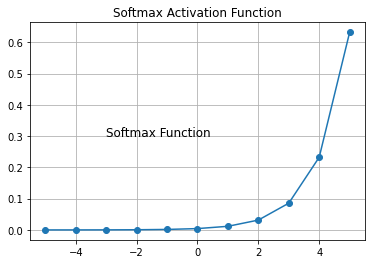

In [83]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

x_values = np.arange(-5, 6)
y_values = softmax(x_values)
plt.plot(x_values, y_values, marker='o')
plt.title('Softmax Activation Function')
plt.grid(True)
plt.annotate('Softmax Function', xy=(-3, 0.3), fontsize=12)
plt.show()